# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-10 11:00:12.121714


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/9/20


,12/9/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,15386562,289373,1.88
Brazil,6728452,178995,2.66
India,9767371,141772,1.45
Mexico,1205229,111655,9.26
United Kingdom,1771545,62663,3.54
Italy,1770149,61739,3.49
France,2377913,56752,2.39


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/9/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
56845,US,14949417,2020-12-07,283703.0,1404.0,192435.0,201176.000000
56844,US,14756982,2020-12-06,282299.0,1113.0,175664.0,196235.428571
56843,US,14581318,2020-12-05,281186.0,2254.0,213881.0,190945.285714
56842,US,14367437,2020-12-04,278932.0,2607.0,227828.0,182659.428571
56841,US,14139609,2020-12-03,276325.0,2879.0,217680.0,179471.714286
56840,US,13921929,2020-12-02,273446.0,2804.0,200107.0,164182.285714
56839,US,13721822,2020-12-01,270642.0,2597.0,180637.0,161493.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/9/20


,12/9/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,733064,35183.0,4.80
Texas,1359951,23657.0,1.74
California,1448987,20411.0,1.41
Florida,1083362,19462.0,1.80
New Jersey,381486,17542.0,4.60
Illinois,812430,14612.0,1.80
Pennsylvania,450924,11726.0,2.60


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/9/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1935,California,1390828,2020-12-07,20015.0,87.0,24155.0,22937.714286
1934,California,1366673,2020-12-06,19928.0,58.0,28732.0,21602.571429
1933,California,1337941,2020-12-05,19870.0,136.0,27634.0,19616.714286
1932,California,1310307,2020-12-04,19734.0,181.0,23757.0,17818.714286
1931,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429
1930,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286
1929,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/9/20


,12/9/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,475271,8075.0,1.70
Orange,93126,1633.0,1.75
Riverside,107620,1539.0,1.43
San Bernardino,111518,1208.0,1.08
San Diego,97549,1103.0,1.13
Sacramento,44688,635.0,1.42
San Joaquin,30225,530.0,1.75


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/9/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6134,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714
6133,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6132,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6131,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6130,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6129,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6128,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6127,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6126,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6125,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000



7 day new US cases as of 12/9/20


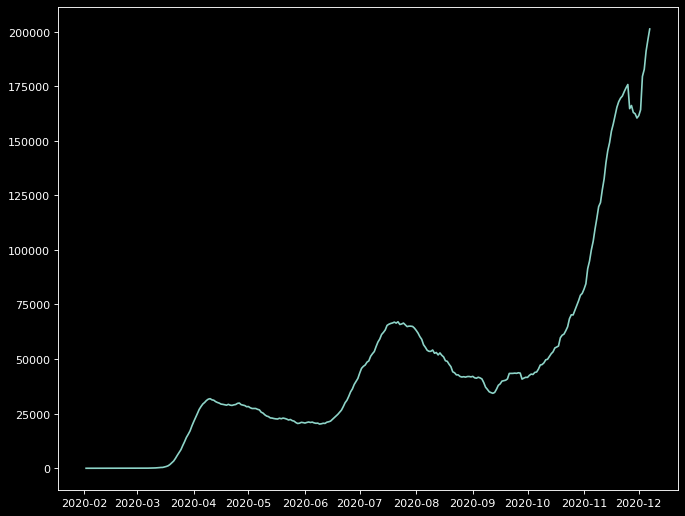

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/9/20


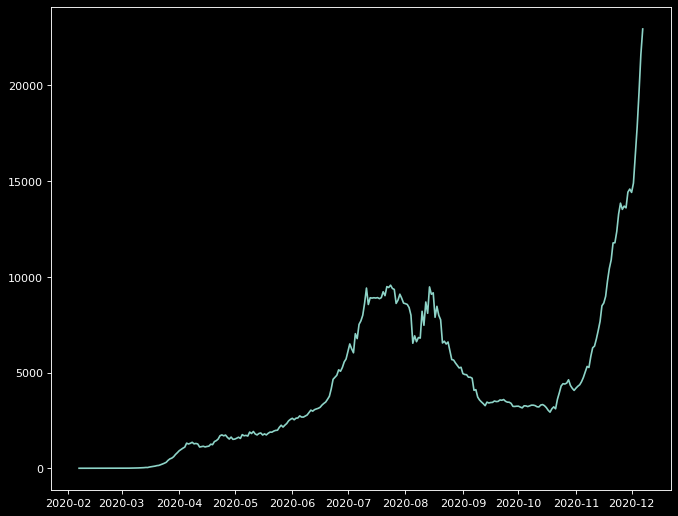

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/9/20


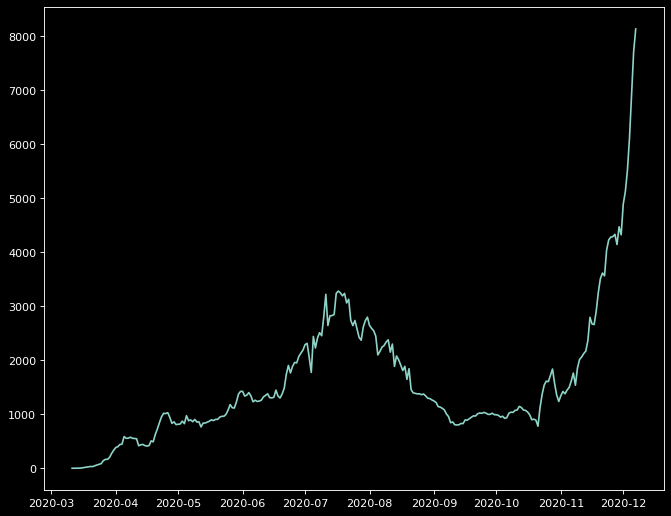

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()